# Data Preprocessing & Understanding

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Dataset.csv")


/tmp/ipykernel_12725/805625135.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Dataset.csv")


In [3]:
data.shape

(195196, 1024)

In [4]:
data.dtypes

NACCID       object
NACCADC       int64
PACKET       object
FORMVER     float64
VISITMO       int64
             ...   
NPATGFRN      int64
NPATGFR1      int64
NPATGFR2      int64
NPATGFR3      int64
NPATGFR4      int64
Length: 1024, dtype: object

In [5]:
print(data.isnull().sum())

NACCID      0
NACCADC     0
PACKET      0
FORMVER     0
VISITMO     0
           ..
NPATGFRN    0
NPATGFR1    0
NPATGFR2    0
NPATGFR3    0
NPATGFR4    0
Length: 1024, dtype: int64


# Feature Engineering & Selection

In [6]:
non_medical_columns = [
                       'NACCADC'
                       ,'PACKET'
                       ,'FORMVER'
                       ,'VISITMO'
                       ,'VISITDAY'
                       ,'VISITYR'
                       ,'NACCVNUM'
                       ,'NACCAVST'
                       ,'NACCNVST'
                       ,'NACCDAYS'
                       ,'NACCFDYS'
                       ,'NACCREAS'
                       ,'NACCREFR'
                       ,'BIRTHMO'
                       ,'BIRTHYR'
                       ,'SEX'
                       ,'HISPANIC'
                       ,'HISPOR'
                       ,'RACE'
                       ,'PRIMLANG'
                       ,'EDUC'
                       ,'MARISTAT'
                       ,'NACCLIVS'
                       ,'INDEPEND'
                       ,'RESIDENC'
                       ,'HANDED'
                       ,'INBIRMO'
                       ,'INBIRYR'
                       ,'INSEX'
                       ,'NEWINF'
                       ,'INHISP'
                       ,'INHISPOR'
                       ,'NACCNINR'
                       ,'INRACE'
                       ,'INEDUC'
                       ,'INRELTO'
                       ,'INKNOWN'
                       ,'INLIVWTH'
                       ,'INVISITS'
                       ,'INCALLS'
                       ,'INRELY'
                       ,'BILLS'
                       ,'TAXES'
                       ,'SHOPPING'
                       ,'GAMES'
                       ,'STOVE'
                       ,'MEALPREP'
                       ,'EVENTS'
                       ,'PAYATTN'
                       ,'REMDATES'
                       ,'TRAVEL'
                       ,'NACCAGEB'
                       ,'NACCNIHR'
                       ,'HEIGHT'
                       ,'WEIGHT'
                       ,'NACCBMI'
                       ,'NACCAGE'
                       ,'NACCDIED'
                       ,'NACCAUTP'
                       ,'NACCACTV'
                       ,'NACCNOVS'
                       ,'NACCNURP'
                       ,'NACCFTD'
                       ,'NACCMDSS'
                       ,'NACCPAFF'
                       ,'NACCLBDM'
                       ,'NACCACSF'
                       ,'NACCPCSF'
                       ,'NACCTCSF'
                       ,'NACCMRSA'
                       ,'NACCNMRI','NACCAPSA','NACCNAPA','TELCOV','TELMOD','NOGDS','SATIS','DROPACT','EMPTY','BORED','SPIRITS','AFRAID','HAPPY','HELPLESS','STAYHOME','MEMPROB','WONDRFUL','WRTHLESS','ENERGY','HOPELESS','BETTER','NACCGDS',
                       ]

In [7]:
lev1=data[non_medical_columns + ['DEMENTED']]

In [8]:
lev1.shape

(195196, 93)

In [9]:
lev1.to_csv('cleaned_data.csv')

In [10]:
for col in lev1.columns:
    print(col,len(lev1[col].unique()),'labels')



NACCADC 46 labels
PACKET 4 labels
FORMVER 4 labels
VISITMO 12 labels
VISITDAY 31 labels
VISITYR 20 labels
NACCVNUM 20 labels
NACCAVST 20 labels
NACCNVST 20 labels
NACCDAYS 5363 labels
NACCFDYS 6108 labels
NACCREAS 4 labels
NACCREFR 4 labels
BIRTHMO 12 labels
BIRTHYR 106 labels
SEX 2 labels
HISPANIC 3 labels
HISPOR 9 labels
RACE 7 labels
PRIMLANG 8 labels
EDUC 33 labels
MARISTAT 7 labels
NACCLIVS 6 labels
INDEPEND 5 labels
RESIDENC 5 labels
HANDED 4 labels
INBIRMO 14 labels
INBIRYR 104 labels
INSEX 3 labels
NEWINF 3 labels
INHISP 4 labels
INHISPOR 10 labels
NACCNINR 8 labels
INRACE 8 labels
INEDUC 34 labels
INRELTO 8 labels
INKNOWN 93 labels
INLIVWTH 3 labels
INVISITS 8 labels
INCALLS 8 labels
INRELY 3 labels
BILLS 7 labels
TAXES 7 labels
SHOPPING 7 labels
GAMES 7 labels
STOVE 7 labels
MEALPREP 7 labels
EVENTS 7 labels
PAYATTN 7 labels
REMDATES 7 labels
TRAVEL 7 labels
NACCAGEB 90 labels
NACCNIHR 7 labels
HEIGHT 290 labels
WEIGHT 329 labels
NACCBMI 480 labels
NACCAGE 93 labels
NACCDIED 

In [13]:
packt_dec = {"I":1,"F":2,"IT":3,"T":4}

lev1['PACKET']=[packt_dec[g] for g in lev1['PACKET'] ]

/tmp/ipykernel_8425/1359476505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lev1['PACKET']=[packt_dec[g] for g in lev1['PACKET'] ]


In [11]:
import seaborn as su
import matplotlib.pyplot as plt

su.heatmap(lev1.corr(),cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'I'

# Model Development & Training

In [12]:
#Same Info Twice
#Neuropathology data from an autopsy is available
columns_to_drop = [
    'NACCFDYS', 'NACCAGEB', 'HEIGHT', 'WEIGHT', 'SATIS', 'DROPACT', 'EMPTY', 
    'BORED', 'SPIRITS', 'AFRAID', 'HAPPY', 'HELPLESS', 'STAYHOME', 
    'MEMPROB', 'WONDRFUL', 'WRTHLESS', 'ENERGY', 'HOPELESS', 'BETTER', 
    'NACCADC', 'NACCAVST', 'NACCNVST', 'NACCDIED', 'NACCAUTP', 'NACCACTV', 
    'NACCNOVS', 'NACCNURP', 'NACCFTD', 'NACCMDSS', 'NACCPAFF', 
    'NACCLBDM', 'NACCACSF', 'NACCPCSF', 'NACCTCSF', 'NACCMRSA', 
    'NACCNMRI', 'NACCAPSA', 'NACCNAPA'
]


# Feature Lists 
numerical_features = [
    'NACCVNUM', 'NACCDAYS', 'EDUC', 'INBIRMO', 'INBIRYR', 'INEDUC', 'INKNOWN',
    'BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS',
    'PAYATTN', 'REMDATES', 'TRAVEL', 'NACCAGE', 'NACCBMI', 'NACCGDS'
]


categorical_features = [
    'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCREAS', 
    'NACCREFR', 'BIRTHMO', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'PRIMLANG', 
    'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INSEX', 
    'NEWINF', 'INHISP', 'INHISPOR', 'NACCNINR', 'INRACE', 'INRELTO', 
    'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCNIHR', 'TELCOV', 
    'TELMOD', 'NOGDS'
]



# Hyperparameter Tuning & Optimization & Model Evaluation & Metrics

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression


y = lev1['DEMENTED']
X = lev1.drop(['DEMENTED'] + columns_to_drop, axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' 
)


**Full Model Pipeline (Using LightGBM)** 

In [15]:

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 10]
}

grid_search = GridSearchCV(
    lgbm_pipeline,
    param_grid,
    cv=3, 
    n_jobs=-1,
    verbose=2
)



In [16]:
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)


print("\n--- Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search.best_params_)


best_model = grid_search.best_estimator_
final_accuracyLightGBM = best_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best Model: {final_accuracyLightGBM:.4f}")

Starting Grid Search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


KeyboardInterrupt: 

**Full Model Pipeline (Using Random Forest)**

In [20]:

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


param_grid_rf = {
    'model__n_estimators': [100, 200],      
    'model__max_depth': [10, 20, None],     
    'model__min_samples_leaf': [1, 2, 4]    
}


grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    cv=3,         
    n_jobs=-1,    
    verbose=2
)

print("Starting Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)


print("\n--- Random Forest Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_rf.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_rf.best_params_)


best_rf_model = grid_search_rf.best_estimator_
final_rf_accuracyRandomForest = best_rf_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best Random Forest: {final_rf_accuracyRandomForest:.4f}")

Starting Grid Search for Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=100; total time=  56.6s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=100; total time=  57.1s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=100; total time=  58.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=100; total time=  59.5s
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=100; total time= 1.0min
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=100; total time= 1.1min
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=200; total time= 1.7min
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=200; total time= 1.8min
[CV] END model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=200; total t

**Full Model Pipeline (Using LogisticRegression)**

In [21]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')) 
])


param_grid_lr = {
    'model__penalty': ['l1', 'l2'],       
    'model__C': [0.01, 0.1, 1.0, 10.0]     
}


grid_search_lr = GridSearchCV(
    lr_pipeline,
    param_grid_lr,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)


print("\n--- Logistic Regression Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_lr.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_lr.best_params_)


best_lr_model = grid_search_lr.best_estimator_
final_lr_accuracy = best_lr_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best Logistic Regression: {final_lr_accuracy:.4f}")

Starting Grid Search for Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....................model__C=0.1, model__penalty=l1; total time=   5.0s
[CV] END ...................model__C=0.01, model__penalty=l1; total time=   6.5s
[CV] END ...................model__C=0.01, model__penalty=l1; total time=   7.3s
[CV] END ...................model__C=0.01, model__penalty=l2; total time=   8.9s
[CV] END ...................model__C=0.01, model__penalty=l2; total time=   9.1s
[CV] END ....................model__C=0.1, model__penalty=l2; total time=   9.6s
[CV] END ...................model__C=0.01, model__penalty=l2; total time=   9.8s
[CV] END ....................model__C=0.1, model__penalty=l2; total time=  10.4s
[CV] END ....................model__C=0.1, model__penalty=l1; total time=  10.5s
[CV] END ....................model__C=0.1, model__penalty=l2; total time=  10.8s
[CV] END ....................model__C=1.0, model__penalty=l1; total time=  10.5s
[

**Full Model Pipeline (Using CatBoostClassifier)**

In [22]:
from catboost import CatBoostClassifier


cb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])

param_grid_cb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 10]
}

grid_search_cb = GridSearchCV(
    cb_pipeline,
    param_grid_cb,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for CatBoost...")
grid_search_cb.fit(X_train, y_train)

print("\n--- CatBoost Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_cb.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_cb.best_params_)

best_cb_model = grid_search_cb.best_estimator_
final_cb_accuracy = best_cb_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best CatBoost: {final_cb_accuracy:.4f}")

Starting Grid Search for CatBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=  47.1s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=  48.7s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=  52.0s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=200; total time=  56.3s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=200; total time= 1.0min
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=200; total time= 1.1min
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100; total time= 1.3min
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100; total time= 1.3min


/home/km/anaconda3/envs/TF/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100; total time= 1.4min
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=  46.7s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=  51.0s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=  51.1s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200; total time=  58.8s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200; total time= 1.0min
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=200; total time= 2.1min
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=200; total time= 2.1min
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=200; total time= 2.2min
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=200; total time= 1.1min
[C

**Full Model Pipeline (Using XGBClassifier)**

In [23]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 10]
}

grid_search_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for XGBoost...")
grid_search_xgb.fit(X_train, y_train)

print("\n--- XGBoost Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_xgb.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_xgb.best_params_)

best_xgb_model = grid_search_xgb.best_estimator_
final_xgb_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best XGBoost: {final_xgb_accuracy:.4f}")

Starting Grid Search for XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=  22.2s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=  22.9s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=  23.6s


/home/km/anaconda3/envs/TF/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=200; total time=  32.4s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=200; total time=  32.5s
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100; total time=  31.1s
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100; total time=  32.6s
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=100; total time=  34.7s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=200; total time=  35.1s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=  16.4s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=  18.6s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=  17.0s
[CV] END model__learning_rate=0.05, model__max_depth=10, model__n_estimators=200; total time=  44.7s

**Neural Network (MLPClassifier) Pipeline**

In [25]:
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(random_state=42, max_iter=1000, early_stopping=True))
])


param_grid_mlp = {
    'model__hidden_layer_sizes': [(100,), (100, 50)], 
    'model__activation': ['relu', 'tanh'],           
    'model__alpha': [0.0001, 0.001]                  
}

grid_search_mlp = GridSearchCV(
    mlp_pipeline,
    param_grid_mlp,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for MLPClassifier (Neural Network)...")
grid_search_mlp.fit(X_train, y_train)

print("\n--- MLPClassifier Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_mlp.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_mlp.best_params_)

best_mlp_model = grid_search_mlp.best_estimator_
final_mlp_accuracy = best_mlp_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best MLPClassifier: {final_mlp_accuracy:.4f}")

Starting Grid Search for MLPClassifier (Neural Network)...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END model__activation=relu, model__alpha=0.001, model__hidden_layer_sizes=(100,); total time= 1.2min
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time= 1.2min
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100, 50); total time= 1.5min
[CV] END model__activation=tanh, model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time=  29.3s
[CV] END model__activation=tanh, model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time=  25.3s
[CV] END model__activation=relu, model__alpha=0.001, model__hidden_layer_sizes=(100,); total time= 1.9min
[CV] END model__activation=relu, model__alpha=0.001, model__hidden_layer_sizes=(100,); total time= 2.0min
[CV] END model__activation=tanh, model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time=  54.3s
[CV] END model__activatio

**StackingClassifier Pipeline (Meta-Model)**

In [ ]:
from sklearn.ensemble import StackingClassifier

estimator_list = [
    ('lgbm', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LGBMClassifier(random_state=42, learning_rate=0.1, max_depth=10, n_estimators=200))
    ])),
    ('rf', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42, max_depth=None, min_samples_leaf=1, n_estimators=200))
    ])),
    ('lr', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=1.0, penalty='l1'))
    ]))
]

stacking_model = StackingClassifier(
    estimators=estimator_list,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=3,       
    n_jobs=-1
)


param_grid_stacking = {
    'final_estimator__C': [0.1, 1.0, 10.0]
}

grid_search_stacking = GridSearchCV(
    stacking_model,
    param_grid_stacking,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for StackingClassifier...")
grid_search_stacking.fit(X_train, y_train)

print("\n--- StackingClassifier Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_stacking.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_stacking.best_params_)

best_stacking_model = grid_search_stacking.best_estimator_
final_stacking_accuracy = best_stacking_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best StackingClassifier: {final_stacking_accuracy:.4f}")

Starting Grid Search for StackingClassifier...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [ ]:
print(f"Accuracy on Test Set with Best LightGBM : {final_accuracyLightGBM:.4f}")
print(f"Accuracy on Test Set with Best Random Forest: {final_rf_accuracyRandomForest:.4f}")
print(f"Accuracy on Test Set with Best Logistic Regression: {final_lr_accuracy:.4f}")
print(f"Accuracy on Test Set with Best CatBoost: {final_cb_accuracy:.4f}")
print(f"Accuracy on Test Set with Best XGBoost: {final_xgb_accuracy:.4f}")
print(f"Accuracy on Test Set with Best MLPClassifier: {final_mlp_accuracy:.4f}")

Model accuracy comparison plot saved as 'model_accuracy_comparison.png'


/tmp/ipykernel_8425/996930243.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  splot = su.barplot(


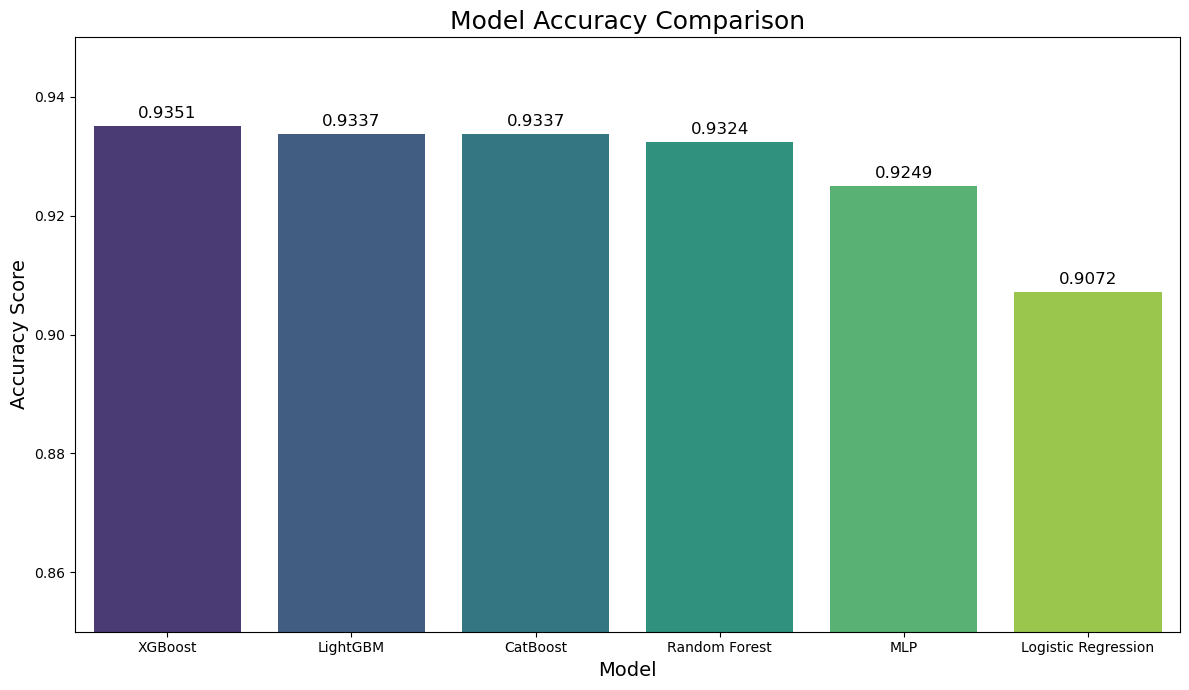

In [26]:
import pandas as pd
import seaborn as su
import matplotlib.pyplot as plt

model_scores = {
    'LightGBM': final_accuracyLightGBM,
    'Random Forest':final_rf_accuracyRandomForest,
    'Logistic Regression': final_lr_accuracy,
    'CatBoost': final_cb_accuracy,      
    'XGBoost': final_xgb_accuracy,       
    'MLP': final_mlp_accuracy,           
    # 'Stacking': final_stacking_accuracy  
}

scores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])
scores_df = scores_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(12, 7)) 

splot = su.barplot(
    x='Model',
    y='Accuracy',
    data=scores_df,
    palette='viridis'
)

plt.title('Model Accuracy Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

plt.ylim(0.85, 0.95) 

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=12)

plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')

print("Model accuracy comparison plot saved as 'model_accuracy_comparison.png'")

# Explainability & Insights